<center><font size='20' color='lightblue'>Examen Final</font></center>

<center><font size='5' color='grey'>Que sea lo que la suerte quiera</center>

In [161]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv(
    '../Data/cervix.csv',
    sep=';',
    na_values='?',
)

In [76]:
df

,Number of sexual partners,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer
0,4.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,5.0,4.0,37.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,3.0,4.0,0.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,3.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
854,2.0,1.0,0.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
855,2.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
856,2.0,2.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [78]:
df.columns

Index(['Number of sexual partners', 'Num of pregnancies', 'Smokes (years)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer'],
      dtype='object')

In [72]:
df.drop(columns=['Age', 'First sexual intercourse', 'Smokes', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'IUD', 'STDs'], inplace=True)

In [75]:
df.dropna(inplace=True)

In [96]:
x = df.drop(columns=['Dx:Cancer'])
y = df['Dx:Cancer']

In [97]:
scaler = StandardScaler()

In [98]:
df_new = scaler.fit_transform(x)

In [100]:
pca = PCA(n_components=19, random_state=32)
pca.fit(df_new)
x_pca = pca.transform(df_new)

In [101]:
pca.explained_variance_ratio_ * 100

array([2.27488350e+01, 8.70537918e+00, 7.94705613e+00, 6.76002128e+00,
       6.35892123e+00, 6.18847989e+00, 5.94190763e+00, 5.88480329e+00,
       5.83183618e+00, 5.60229283e+00, 5.43248235e+00, 4.30444370e+00,
       4.14070699e+00, 3.68725212e+00, 4.04506765e-01, 6.10754149e-02,
       1.34419217e-29, 2.34332104e-32, 2.28711648e-35])

In [102]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 22.74883501,  31.45421419,  39.40127032,  46.1612916 ,
        52.52021283,  58.70869272,  64.65060035,  70.53540364,
        76.36723982,  81.96953265,  87.402015  ,  91.7064587 ,
        95.8471657 ,  99.53441782,  99.93892459, 100.        ,
       100.        , 100.        , 100.        ])

Text(0, 0.5, 'Varianza explicada')

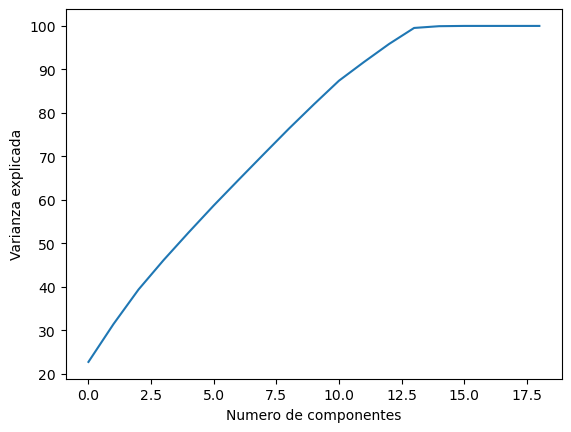

In [103]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza explicada')

In [105]:
np.cumsum(pca.explained_variance_ratio_ * 100)[12]

95.84716569545267

In [106]:
pca_2 = PCA(n_components=0.95, random_state=32)
pca_2.fit(df_new)
x_pca_2 = pca_2.transform(df_new)

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x_pca_2, y, test_size=0.3, random_state=32)

In [144]:
clf = RandomForestClassifier(random_state=32, criterion='gini').fit(x_train, y_train)

In [145]:
scores = cross_val_score(clf, x_train, y_train, cv=5)

In [146]:
prediction = clf.predict(x_test)

In [157]:
confusion_matrix(y_test, prediction)

array([[196,   0],
       [  6,   0]])

In [148]:
scores.mean()

0.974535274356103

In [149]:
scores.std()

0.005130490626368667

In [158]:
recall_score(y_test, prediction)

0.0

In [150]:
clf_2 = RandomForestClassifier(random_state=32, criterion='entropy').fit(x_train, y_train)

In [151]:
scores_2 = cross_val_score(clf_2, x_train, y_train, cv=5)

In [152]:
prediction_2 = clf_2.predict(x_test)

In [153]:
confusion_matrix(y_test, prediction_2)

array([[196,   0],
       [  6,   0]])

In [154]:
scores_2.mean()

0.972407614781635

In [159]:
recall_score(y_test, prediction_2)

0.0

In [187]:
test = pd.read_csv(
    '../Data/cervix.csv',
    sep=';',
    na_values='?',
)

In [188]:
test.dropna(inplace=True)
test.reset_index(drop=True, inplace=True)

In [189]:
w_test = test.drop(columns=['Dx:Cancer'])
z_test = test['Dx:Cancer']

In [190]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [191]:
w_over, z_over = oversample.fit_resample(w_test, z_test)

In [196]:
corr_matrix = test.corr().abs()

In [201]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_71004/1559577561.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [202]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]

In [205]:
test_selected_features = test.drop(columns=to_drop)

In [206]:
test_selected_features

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,STDs,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer
0,18,4.0,15.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,52,5.0,16.0,4.0,1.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,46,3.0,21.0,4.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,42,3.0,23.0,2.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,34,3.0,18.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
664,32,2.0,19.0,1.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
665,25,2.0,17.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
666,33,2.0,24.0,2.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [207]:
w_test = test_selected_features.drop(columns=['Dx:Cancer'])
z_test = test_selected_features['Dx:Cancer']

In [208]:
oversample = RandomOverSampler(sampling_strategy='minority')


In [209]:
w_over, z_over = oversample.fit_resample(w_test, z_test)

In [210]:
scaler = StandardScaler()

In [211]:
test_new = scaler.fit_transform(w_over)

In [213]:
pca = PCA(n_components=19, random_state=32)
pca.fit(test_new)
x_pca = pca.transform(test_new)

Text(0, 0.5, 'Varianza explicada')

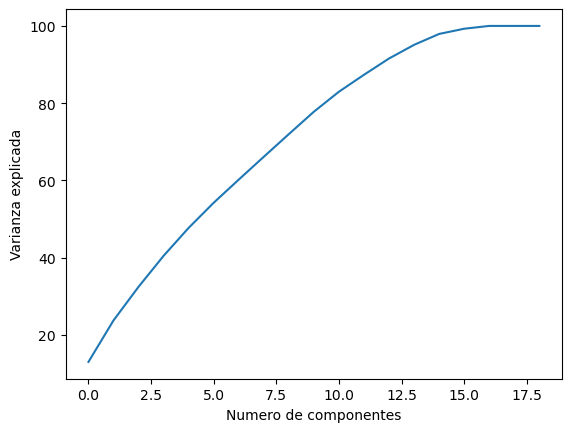

In [214]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza explicada')

In [216]:
np.cumsum(pca.explained_variance_ratio_ * 100)[13]

95.10197692203032

In [223]:
pca_2 = PCA(n_components=0.95, random_state=32)
pca_2.fit(test_new)
x_pca_2 = pca_2.transform(test_new)

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x_pca_2, z_over, test_size=0.3, random_state=32)

In [231]:
rf = RandomForestClassifier(random_state=32)

In [232]:
parameters = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [225]:
clf = RandomForestClassifier(random_state=32, criterion='gini').fit(x_train, y_train)

In [226]:
scores = cross_val_score(clf, x_train, y_train, cv=5)

In [227]:
prediction = clf.predict(x_test)

In [228]:
confusion_matrix(y_test, prediction)

array([[200,   0],
       [  0, 191]])

In [229]:
recall_score(y_test, prediction)

1.0

In [230]:
scores.mean()

0.9967153065513721